In [1]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras import utils

In [2]:
orifile = "https://github.com/dicodingacademy/assets/releases/download/release/rockpaperscissors.zip"

extract = !False

utils.get_file(origin=orifile, cache_dir="/tmp", extract=extract)

'/tmp/datasets/rockpaperscissors.zip'

In [ ]:
base_dir = "/tmp/datasets/rockpaperscissors/rps-cv-images"

batch_size = 128; image_size = (150, 150); validation_split = 0.3; seed = 404

(train, testi) = utils.image_dataset_from_directory(
    base_dir,
    batch_size=batch_size,
    image_size=image_size,
    subset="both", seed=seed,
    validation_split=validation_split,
    interpolation="nearest"
)

output_node = len(train.class_names)

In [4]:
def relayer(image, label):
    image = tf.cast(image, tf.float32)
    image = tf.math.divide(image, 255.0)
    return image, label

train = train.map(relayer).shuffle(100).cache()

testi = testi.map(relayer)

In [5]:
from Hantu import Hantu

model = Hantu(output_node)

In [6]:
loss = "SparseCategoricalCrossentropy"

model.compile(optimizer="adam", loss=loss, metrics=["accuracy"])

In [7]:
hist = model.fit(train, validation_data=testi, epochs=8, verbose=1)

Epoch 1/8
12/12 [==============================] - 14s 268ms/step - loss: 1.1055 - accuracy: 0.3916 - val_loss: 1.0497 - val_accuracy: 0.6631
Epoch 2/8
12/12 [==============================] - 2s 158ms/step - loss: 0.9969 - accuracy: 0.5209 - val_loss: 0.8159 - val_accuracy: 0.6966
Epoch 3/8
12/12 [==============================] - 2s 154ms/step - loss: 0.8515 - accuracy: 0.6299 - val_loss: 0.6798 - val_accuracy: 0.7500
Epoch 4/8
12/12 [==============================] - 2s 154ms/step - loss: 0.6671 - accuracy: 0.7317 - val_loss: 0.4553 - val_accuracy: 0.8567
Epoch 5/8
12/12 [==============================] - 2s 157ms/step - loss: 0.4720 - accuracy: 0.8401 - val_loss: 0.2639 - val_accuracy: 0.9405
Epoch 6/8
12/12 [==============================] - 3s 295ms/step - loss: 0.3217 - accuracy: 0.9086 - val_loss: 0.1566 - val_accuracy: 0.9604
Epoch 7/8
12/12 [==============================] - 2s 175ms/step - loss: 0.2537 - accuracy: 0.9289 - val_loss: 0.1650 - val_accuracy: 0.9497
Epoch 8/8
12

In [8]:
model.evaluate(train, verbose=0)

[0.10501728951931, 0.9706266522407532]

In [9]:
model.evaluate(testi, verbose=0)

[0.0994376465678215, 0.9649389982223511]

In [10]:
from Histplot import Histplot

image_hist = Histplot(hist, hist_acc="accuracy")

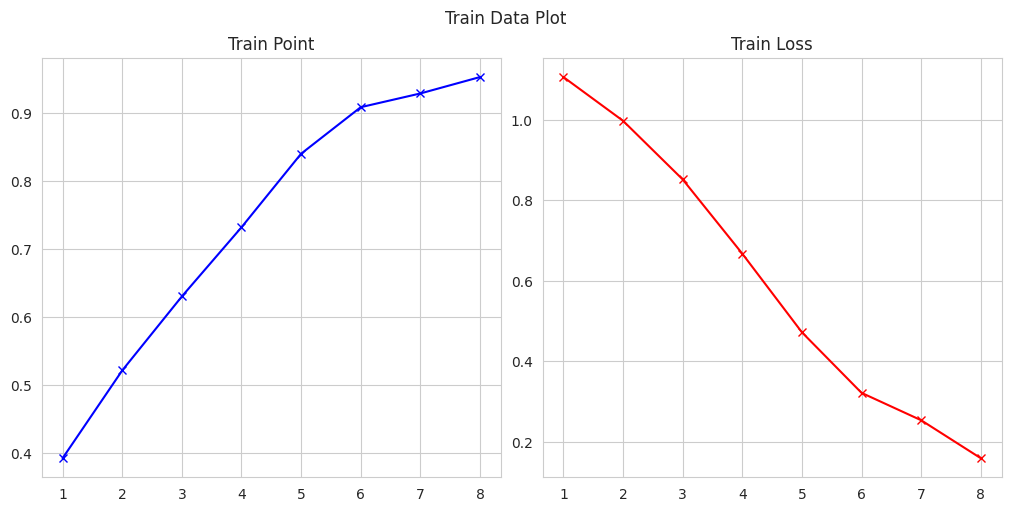

In [11]:
image_hist.Trainplot()

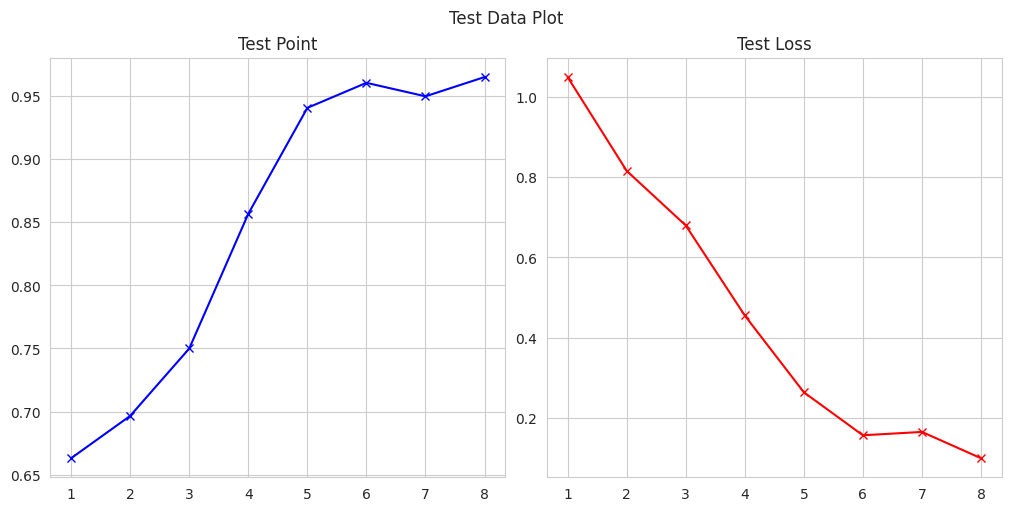

In [12]:
image_hist.Testiplot()

In [13]:
!echo "deb http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal" | tee /etc/apt/sources.list.d/tensorflow-serving.list && \
curl https://storage.googleapis.com/tensorflow-serving-apt/tensorflow-serving.release.pub.gpg | apt-key add -
!apt update

!apt-get install tensorflow-model-server

In [14]:
ModelFolder = "/tmp/model"

if os.path.exists(ModelFolder):
  pass
else:
  os.mkdir(ModelFolder)

In [15]:
ModelSerial = "1"

Modelable = os.path.join(ModelFolder, ModelSerial)

tf.saved_model.save(model, Modelable)

In [16]:
os.environ["ModelFolder"] = ModelFolder

In [17]:
%%bash --bg
nohup tensorflow_model_server \
  --rest_api_port=8501 \
  --model_name=inter_model \
  --model_base_path="${ModelFolder}" > server.log 2>&1

In [18]:
!tail server.log

In [19]:
import json, requests

test_img, test_label = next(iter(testi))

test_img = test_img.numpy().tolist()

url = "http://127.0.0.1:8501/v1/models/inter_model:predict"

In [20]:
from Hela import Modeler

output_max = Modeler(test_img, url)

In [21]:
output_max

array([2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       2, 2, 2, 2, 1, 1, 2, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 2, 2, 1, 1, 2,
       1, 2, 1, 1, 1, 0, 0, 1, 0, 2, 2, 0, 2, 1, 0, 1, 1, 2, 2, 0, 0, 1,
       2, 0, 0, 0, 1, 2, 1, 2, 0, 0, 2, 2, 2, 1, 0, 0, 1, 1, 2, 2, 1, 0,
       1, 2, 2, 0, 2, 1, 2, 1, 0, 1, 2, 1, 0, 1, 1, 0, 1, 1, 0, 1, 2, 1,
       0, 0, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 0, 2, 2, 1])

In [22]:
logits = Modeler(test_img, url, output="original")

In [23]:
test_label[:10].numpy()

array([2, 0, 2, 0, 0, 0, 0, 0, 0, 2], dtype=int32)

In [24]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()

loss_i = loss_fn(test_label, logits); loss_i.numpy()

0.117400825